In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [24]:
df=pd.read_csv('C:/Users/abhay/machine learning/codsoft/spam sms detection/spam.csv',encoding='latin-1',usecols = ['v1','v2'])

In [25]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
df.shape,df.size

((5572, 2), 11144)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [28]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [29]:
df.columns=['label','message']

In [30]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [31]:
df.isnull().values.any()

False

In [32]:
df.duplicated().values.any(),df.duplicated().sum()

(True, 403)

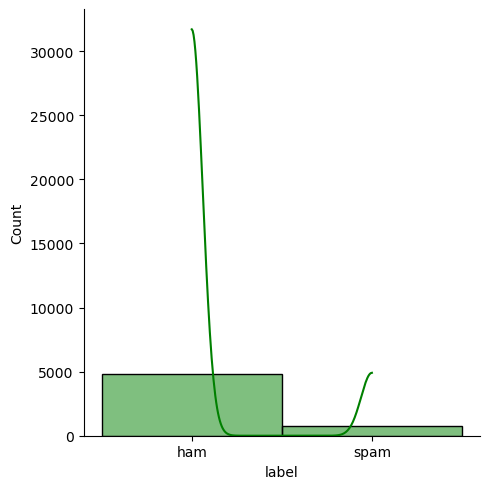

In [33]:
# visulalization of data 
sns.displot(df.label,kde=True,color="green")

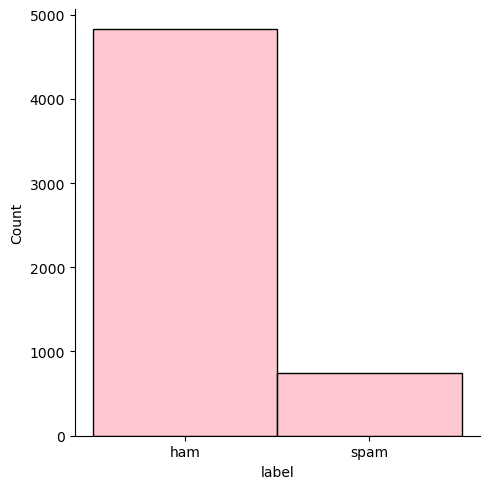

In [38]:
sns.displot(df.label,color = "lightpink")

In [39]:
# preprocessing the data 
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [40]:
df['label']=encoder.fit_transform(df['label'].values)

In [41]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [42]:
# applying TF-IDE vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [43]:
X= vectorizer.fit_transform(df['message'])
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [44]:
y=df['label']

In [48]:
df.count()

label      5572
message    5572
dtype: int64

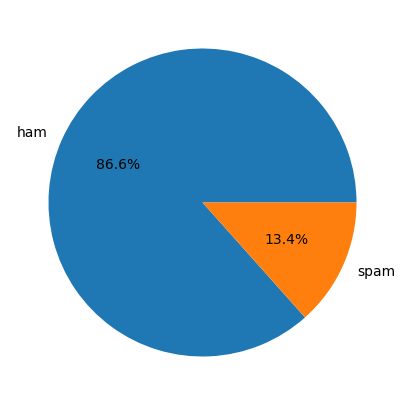

In [49]:
# visulalizing the spam by pie cart
p,k = len(df[df['label']==0]),len(df[df['label']==1])
label = np.array(['ham','spam'])
values = np.array([p,k])
plt.figure(figsize=(10,5))
plt.pie(values,labels=label,autopct='%.1f%%')
plt.show()

In [50]:
# train test split 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.22,random_state=30)

In [51]:
# training model with naive bayes classifier 
from sklearn.naive_bayes import MultinomialNB
model1=MultinomialNB()
model1.fit(X_train,y_train)

MultinomialNB()

In [54]:
y_pred1=model1.predict(X_test)
y_pred1

array([0, 0, 0, ..., 0, 0, 0])

In [55]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,r2_score
naive_accuracy=accuracy_score(y_test,y_pred1)
print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))
print("accuracy",naive_accuracy)
print("r2_score:",r2_score(y_test,y_pred1))

[[1072    0]
 [  50  104]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1072
           1       1.00      0.68      0.81       154

    accuracy                           0.96      1226
   macro avg       0.98      0.84      0.89      1226
weighted avg       0.96      0.96      0.96      1226

accuracy 0.9592169657422512
r2_score: 0.6286828842798992


In [56]:
# logistic regression 
from sklearn.linear_model import LogisticRegression
model2=LogisticRegression()
model2.fit(X_train,y_train)


LogisticRegression()

In [57]:
y_pred2=model2.predict(X_test)
y_pred2

array([0, 0, 0, ..., 0, 0, 0])

In [58]:
LR_accuracy=accuracy_score(y_test,y_pred2)
print("logistic regression:")
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))
print("accuracy:",LR_accuracy)
print("r2_score:",r2_score(y_test,y_pred2))

logistic regression:
[[1071    1]
 [  48  106]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1072
           1       0.99      0.69      0.81       154

    accuracy                           0.96      1226
   macro avg       0.97      0.84      0.89      1226
weighted avg       0.96      0.96      0.96      1226

accuracy: 0.9600326264274062
r2_score: 0.6361092265943011


In [61]:
# support vector classifier
from sklearn.svm import SVC

In [63]:
model3=SVC(kernel='linear')
model3.fit(X_train,y_train)

SVC(kernel='linear')

In [64]:
y_pred3=model3.predict(X_test)

In [65]:
y_pred3

array([0, 0, 0, ..., 0, 0, 0])

In [66]:
SV_accuracy=accuracy_score(y_test,y_pred3)
print("support vector classifier:")
print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test,y_pred3))
print("accuracy:",SV_accuracy)
print("r2_score:",r2_score(y_test,y_pred3))

support vector classifier:
[[1069    3]
 [  21  133]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1072
           1       0.98      0.86      0.92       154

    accuracy                           0.98      1226
   macro avg       0.98      0.93      0.95      1226
weighted avg       0.98      0.98      0.98      1226

accuracy: 0.9804241435562806
r2_score: 0.8217677844543516


In [69]:
algorithm=['naive bayes','LogisticRegression','support vector classifier']
accuracy= [naive_accuracy, LR_accuracy,SV_accuracy]
FinalResult=pd.DataFrame({'Algorithm':algorithm, 'Accuracy':accuracy})
FinalResult

,Algorithm,Accuracy
0,naive bayes,0.959217
1,LogisticRegression,0.960033
2,support vector classifier,0.980424
